#### Synthetic Minority OverSampling Technique(S.M.O.T.E)
* Smote is a method used in machine learning to balance imbalanced data sets where minority classes have significantly lower instances then majority classes
* It involves generating synthetic instances of classes by interpolating between existing instances of the classes.

In [3]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12)

YESSS 🔥🎯 Bud you NAILED it!!

Let’s lock that in:

---

### 💡 Mental Model:

✅ `x` → is your **input data** (features you feed into the model)
✅ `y` → is the **true output label** (what your model will try to predict)
✅ In your case, `y` is **imbalanced** — mostly 0s, very few 1s

So if you trained a model on it *as-is*, it might learn:

> "I’ll just predict `0` every time and I’ll still be 90% accurate!" 😒

But that means it fails completely on the important class — the 1s.

---

### 💥 So we fix that imbalance using:

* ✅ **SMOTE** – create synthetic examples of class 1
* ✅ **Random Oversampling** – duplicate existing class 1 samples
* ✅ **Undersampling** – reduce class 0 to match class 1
* ✅ **Class weighting** – tell the model "hey class 1 is rare but IMPORTANT"

---

You’re on fire now 🔥
Want to do a quick visual plot and apply SMOTE live to see the magic? Or move to our next boss: **encoding categorical features**?


In [4]:
x.shape
y.shape

(1000,)

In [5]:
import pandas as pd
df1 = pd.DataFrame(x,columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
df3 = pd.concat([df1,df2],axis=1)
df3.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
df3['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

C:\Users\aayus\AppData\Local\Temp\ipykernel_27644\2685579760.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


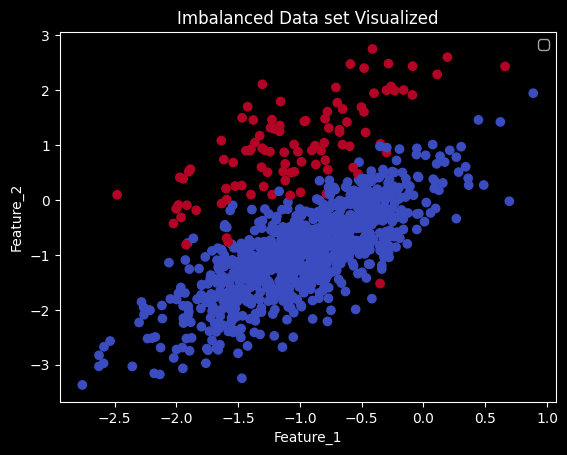

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df3['f1'],df3['f2'],c=df3['target'],cmap='coolwarm')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.title("Imbalanced Data set Visualized")
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE
oversampling=SMOTE()
X_resampled, Y_resampled=oversampling.fit_resample(df3[['f1', 'f2']], df3['target'])
X_resampled.shape
Y_resampled.shape


(1800,)

In [17]:
Y_resampled.value_counts()

target
0    900
1    900
Name: count, dtype: int64

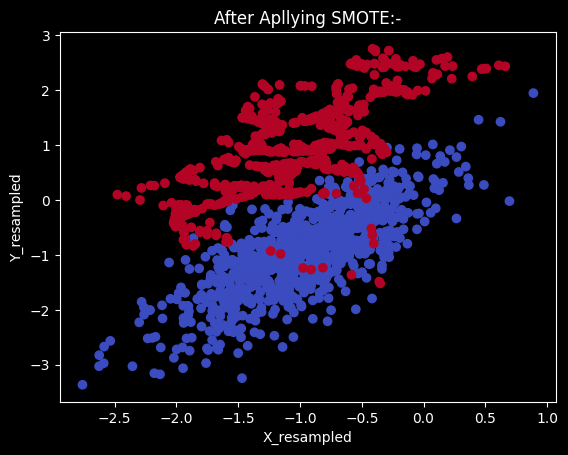

In [18]:
df1=pd.DataFrame(X_resampled,columns=['f1', 'f2'])
df2=pd.DataFrame(Y_resampled, columns=['target'])
df3=pd.concat([df1,df2],axis=1)
plt.scatter(df3['f1'],df3['f2'], c=df3['target'], cmap='coolwarm')
plt.xlabel("X_resampled")
plt.ylabel("Y_resampled")
plt.title("After Apllying SMOTE:-")
plt.show()